# Addestramento mediante RFDs

In [63]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## 1. Inizializzazione dataset

In [18]:
#tipo = 1 tutto il dataset
#tipo = 2 dataset con solo RFD
def initialize_data(dataset, tipo, threshold, percentage = 100):
    train_path = dataset

    # lettura dataset
    train_df = pd.read_csv(train_path,sep=';',encoding = "ISO-8859-1")
    train_df = train_df.fillna(1)

    print("Dataset",dataset.split("/")[2],"letto!")

    last_n_columns  = train_df.iloc[: , -(len(train_df.axes[1])-16):]
    native_columns = train_df.iloc[: , :16]
    print("Selection of the last 16 columns!")

    last_n_columns = last_n_columns.sort_values(by = 9019, axis = 1)
    first_selected_columns = last_n_columns.iloc[: , :(int((len(last_n_columns.axes[1])*percentage)/100))]
    print("Sorting and selecting first column!")

    number_of_columns_to_select = 0
    occurrence = False

    for i in range(0, len(first_selected_columns.axes[1])):
        if first_selected_columns.loc[9019][i] > threshold:
            occurrence = True
            number_of_columns_to_select = i-1
            break

    print("number_of_columns_to_select:",number_of_columns_to_select)
    if occurrence:
        final_selected_columns = first_selected_columns.iloc[: , :number_of_columns_to_select]
    else:
        final_selected_columns = first_selected_columns

    #-----------------------------------
    label_encoder = preprocessing.LabelEncoder()
    if tipo == 1:
        train_df = pd.concat([native_columns, final_selected_columns], axis=1)

        train_df = train_df.iloc[:-1 , :]

        print("Numero colonne: ", train_df.shape[1])
        Y = label_encoder.fit_transform(train_df["class"])
        del train_df["class"]
    else:
        train_df = pd.concat([final_selected_columns, native_columns['class']], axis=1)
        train_df = train_df.iloc[:-1 , :]
        print("Numero colonne: ", train_df.shape[1])
        Y = label_encoder.fit_transform(train_df["class"])
        del train_df["class"]
    #-----------------------------------

    x_train, x_test, y_train, y_test = train_test_split(train_df, Y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

## 2. Prediction dei modelli con migliori iperparametri

In [19]:
def KNN_prediction():
    best_params = {'algorithm': 'ball_tree',
                   'metric': 'euclidean',
                   'n_neighbors': 3,
                   'weights': 'distance'
                   }

    knn = KNeighborsClassifier(**best_params)
    # Fit the classifier to the data
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for KNN on Test data: ",accuracy_value)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def RF_prediction():
    best_params = {'max_depth': 10,
                   'max_features': 'sqrt',
                   'max_samples': None,
                   'n_estimators': 50
                   }

    rfc = RandomForestClassifier(random_state = 42, **best_params)

    # Fit the classifier to the data
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for RF on Test data: ",accuracy_value)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def DT_prediction():
    best_params = {'criterion': 'gini',
                   'max_depth': 10,
                   'max_features': 10,
                   'max_leaf_nodes': 15,
                   'min_samples_leaf': 2,
                   'min_samples_split': 3
                   }

    #train with best hyperparameters
    dt = DecisionTreeClassifier(random_state=42, **best_params)
    dt.fit(x_train, y_train)

    y_pred = dt.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for Decision Tree on Test data: ",accuracy_value)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def SVC_prediction():
    best_params = {'C': 1.5,
                   'coef0': 1.0,
                   'degree': 3,
                   'gamma': 1,
                   'kernel': 'poly'
                   }

    svc = SVC(random_state=42, **best_params)
    svc.fit(x_train, y_train)

    y_pred = svc.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for SVC on Test data: ",accuracy_value)

    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def LR_prediction():
    best_params = {'C': 1.0,
                   'fit_intercept': True,
                   'max_iter': 500,
                   'penalty': None,
                   'solver': 'lbfgs'
                   }

    lr = LogisticRegression(random_state=42, **best_params)
    lr.fit(x_train, y_train)

    y_pred = lr.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for Logistic Regression on Test data: ",accuracy_value)

    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def draw_confusion(df_cm, title, filename):
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt=".0f")
    plt.title(title)
    plt.savefig("{}-confusion.pdf".format(filename))
    #plt.show()
    plt.cla()
    plt.clf()

## 3. Risultati

### 3.1 Dataset RFDs+16

In [29]:
full_datasets = ["../datasets/rfds_0_with_chi.csv",
                 "../datasets/rfds_2_with_chi.csv", "../datasets/rfds_4_with_chi.csv"]

dataframes_results = []
results_dict = {}

for dataset_name in full_datasets:
    tipo = 1
    comparison_thr = dataset_name.split("_")[1]
    for thr in [0.1]:
        x_train, x_test, y_train, y_test = initialize_data(dataset_name, tipo, thr)

        accuracy_value_RF, report_RF, df_cm_RF = RF_prediction()
        #draw_confusion(df_cm_RF, 'RF Confusion Matrix Correlation-Coefficient', "RF_thr_{}".format(thr))
        results_dict['RF_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_RF
        report_RF['dataset'] = dataset_name.split("/")[2]
        report_RF['comparison_thr'] = comparison_thr
        report_RF['model'] = 'RF'
        report_RF['thr'] = thr
        report_RF['tipo'] = tipo
        report_RF['accuracy_value'] = accuracy_value_RF
        report_RF['TP'] = df_cm_RF[0][0]
        report_RF['FP'] = df_cm_RF[0][1]
        report_RF['FN'] = df_cm_RF[1][0]
        report_RF['TN'] = df_cm_RF[1][1]

        accuracy_value_DT, report_DT, df_cm_DT = DT_prediction()
        #draw_confusion(df_cm_DT, 'DT Confusion Matrix Correlation-Coefficient', "DT_thr_{}".format(thr))
        results_dict['DT_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_DT
        report_DT['dataset'] = dataset_name.split("/")[2]
        report_DT['comparison_thr'] = comparison_thr
        report_DT['model'] = 'DT'
        report_DT['thr'] = thr
        report_DT['tipo'] = tipo
        report_DT['accuracy_value'] = accuracy_value_DT
        report_DT['TP'] = df_cm_DT[0][0]
        report_DT['FP'] = df_cm_DT[0][1]
        report_DT['FN'] = df_cm_DT[1][0]
        report_DT['TN'] = df_cm_DT[1][1]

        accuracy_value_SVC, report_SVC, df_cm_SVC = SVC_prediction()
        #draw_confusion(df_cm_SVC, 'SVC Confusion Matrix Correlation-Coefficient', "SVC_thr_{}".format(thr))
        results_dict['SVC_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_SVC
        report_SVC['dataset'] = dataset_name.split("/")[2]
        report_SVC['comparison_thr'] = comparison_thr
        report_SVC['model'] = 'SVC'
        report_SVC['thr'] = thr
        report_SVC['tipo'] = tipo
        report_SVC['accuracy_value'] = accuracy_value_SVC
        report_SVC['TP'] = df_cm_SVC[0][0]
        report_SVC['FP'] = df_cm_SVC[0][1]
        report_SVC['FN'] = df_cm_SVC[1][0]
        report_SVC['TN'] = df_cm_SVC[1][1]

        accuracy_value_LR, report_LR, df_cm_LR = LR_prediction()
        #draw_confusion(df_cm_LR, 'LR Confusion Matrix Correlation-Coefficient', "LR_thr_{}".format(thr))
        results_dict['LR_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_LR
        report_LR['dataset'] = dataset_name.split("/")[2]
        report_LR['comparison_thr'] = comparison_thr
        report_LR['model'] = 'LR'
        report_LR['thr'] = thr
        report_LR['tipo'] = tipo
        report_LR['accuracy_value'] = accuracy_value_LR
        report_LR['TP'] = df_cm_LR[0][0]
        report_LR['FP'] = df_cm_LR[0][1]
        report_LR['FN'] = df_cm_LR[1][0]
        report_LR['TN'] = df_cm_LR[1][1]

        accuracy_value_KNN, report_KNN, df_cm_KNN = KNN_prediction()
        #draw_confusion(df_cm_KNN, 'KNN Confusion Matrix Correlation-Coefficient', "KNN_thr_{}".format(thr))
        results_dict['KNN_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_KNN
        report_KNN['dataset'] = dataset_name.split("/")[2]
        report_KNN['comparison_thr'] = comparison_thr
        report_KNN['model'] = 'KNN'
        report_KNN['thr'] = thr
        report_KNN['tipo'] = tipo
        report_KNN['accuracy_value'] = accuracy_value_KNN
        report_KNN['TP'] = df_cm_KNN[0][0]
        report_KNN['FP'] = df_cm_KNN[0][1]
        report_KNN['FN'] = df_cm_KNN[1][0]
        report_KNN['TN'] = df_cm_KNN[1][1]

Dataset rfds_0_with_chi.csv letto!
Selection of the last 16 columns!
Sorting and selecting first column!
number_of_columns_to_select: 2
Numero colonne:  18


C:\Users\rafau\AppData\Local\Temp\ipykernel_33900\2950289215.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if first_selected_columns.loc[9019][i] > threshold:


Accuracy for RF on Test data:  0.9990044798407167
{'0': {'precision': 0.9980099502487563, 'recall': 1.0, 'f1-score': 0.999003984063745, 'support': 1003.0}, '1': {'precision': 1.0, 'recall': 0.9980119284294234, 'f1-score': 0.9990049751243781, 'support': 1006.0}, 'accuracy': 0.9990044798407167, 'macro avg': {'precision': 0.9990049751243781, 'recall': 0.9990059642147118, 'f1-score': 0.9990044795940616, 'support': 2009.0}, 'weighted avg': {'precision': 0.9990064609753622, 'recall': 0.9990044798407167, 'f1-score': 0.9990044803340272, 'support': 2009.0}}
[[1003    0]
 [   2 1004]]
Accuracy for Decision Tree on Test data:  0.9965156794425087
{'0': {'precision': 0.9930693069306931, 'recall': 1.0, 'f1-score': 0.9965226030799801, 'support': 1003.0}, '1': {'precision': 1.0, 'recall': 0.9930417495029821, 'f1-score': 0.9965087281795512, 'support': 1006.0}, 'accuracy': 0.9965156794425087, 'macro avg': {'precision': 0.9965346534653465, 'recall': 0.9965208747514911, 'f1-score': 0.9965156656297656, 'su

C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


Accuracy for KNN on Test data:  0.987058237929318
{'0': {'precision': 0.992936427850656, 'recall': 0.9810568295114656, 'f1-score': 0.9869608826479438, 'support': 1003.0}, '1': {'precision': 0.981335952848723, 'recall': 0.9930417495029821, 'f1-score': 0.9871541501976284, 'support': 1006.0}, 'accuracy': 0.987058237929318, 'macro avg': {'precision': 0.9871361903496895, 'recall': 0.9870492895072238, 'f1-score': 0.9870575164227862, 'support': 2009.0}, 'weighted avg': {'precision': 0.9871275289696482, 'recall': 0.987058237929318, 'f1-score': 0.9870576607240925, 'support': 2009.0}}
[[984  19]
 [  7 999]]
Dataset rfds_2_with_chi.csv letto!
Selection of the last 16 columns!
Sorting and selecting first column!
number_of_columns_to_select: 13
Numero colonne:  29


C:\Users\rafau\AppData\Local\Temp\ipykernel_33900\2950289215.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if first_selected_columns.loc[9019][i] > threshold:


Accuracy for RF on Test data:  0.9990044798407167
{'0': {'precision': 0.9980099502487563, 'recall': 1.0, 'f1-score': 0.999003984063745, 'support': 1003.0}, '1': {'precision': 1.0, 'recall': 0.9980119284294234, 'f1-score': 0.9990049751243781, 'support': 1006.0}, 'accuracy': 0.9990044798407167, 'macro avg': {'precision': 0.9990049751243781, 'recall': 0.9990059642147118, 'f1-score': 0.9990044795940616, 'support': 2009.0}, 'weighted avg': {'precision': 0.9990064609753622, 'recall': 0.9990044798407167, 'f1-score': 0.9990044803340272, 'support': 2009.0}}
[[1003    0]
 [   2 1004]]
Accuracy for Decision Tree on Test data:  0.9955201592832255
{'0': {'precision': 0.997, 'recall': 0.9940179461615155, 'f1-score': 0.9955067398901648, 'support': 1003.0}, '1': {'precision': 0.9940535183349851, 'recall': 0.9970178926441352, 'f1-score': 0.9955334987593052, 'support': 1006.0}, 'accuracy': 0.9955201592832255, 'macro avg': {'precision': 0.9955267591674926, 'recall': 0.9955179194028254, 'f1-score': 0.9955

C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


Accuracy for KNN on Test data:  0.987058237929318
{'0': {'precision': 0.992936427850656, 'recall': 0.9810568295114656, 'f1-score': 0.9869608826479438, 'support': 1003.0}, '1': {'precision': 0.981335952848723, 'recall': 0.9930417495029821, 'f1-score': 0.9871541501976284, 'support': 1006.0}, 'accuracy': 0.987058237929318, 'macro avg': {'precision': 0.9871361903496895, 'recall': 0.9870492895072238, 'f1-score': 0.9870575164227862, 'support': 2009.0}, 'weighted avg': {'precision': 0.9871275289696482, 'recall': 0.987058237929318, 'f1-score': 0.9870576607240925, 'support': 2009.0}}
[[984  19]
 [  7 999]]
Dataset rfds_4_with_chi.csv letto!
Selection of the last 16 columns!
Sorting and selecting first column!
number_of_columns_to_select: 11
Numero colonne:  27


C:\Users\rafau\AppData\Local\Temp\ipykernel_33900\2950289215.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if first_selected_columns.loc[9019][i] > threshold:


Accuracy for RF on Test data:  0.9990044798407167
{'0': {'precision': 0.9980099502487563, 'recall': 1.0, 'f1-score': 0.999003984063745, 'support': 1003.0}, '1': {'precision': 1.0, 'recall': 0.9980119284294234, 'f1-score': 0.9990049751243781, 'support': 1006.0}, 'accuracy': 0.9990044798407167, 'macro avg': {'precision': 0.9990049751243781, 'recall': 0.9990059642147118, 'f1-score': 0.9990044795940616, 'support': 2009.0}, 'weighted avg': {'precision': 0.9990064609753622, 'recall': 0.9990044798407167, 'f1-score': 0.9990044803340272, 'support': 2009.0}}
[[1003    0]
 [   2 1004]]
Accuracy for Decision Tree on Test data:  0.9965156794425087
{'0': {'precision': 0.9940476190476191, 'recall': 0.9990029910269193, 'f1-score': 0.9965191447041273, 'support': 1003.0}, '1': {'precision': 0.999000999000999, 'recall': 0.9940357852882704, 'f1-score': 0.9965122072745392, 'support': 1006.0}, 'accuracy': 0.9965156794425087, 'macro avg': {'precision': 0.996524309024309, 'recall': 0.9965193881575949, 'f1-sco

C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


Accuracy for KNN on Test data:  0.987058237929318
{'0': {'precision': 0.992936427850656, 'recall': 0.9810568295114656, 'f1-score': 0.9869608826479438, 'support': 1003.0}, '1': {'precision': 0.981335952848723, 'recall': 0.9930417495029821, 'f1-score': 0.9871541501976284, 'support': 1006.0}, 'accuracy': 0.987058237929318, 'macro avg': {'precision': 0.9871361903496895, 'recall': 0.9870492895072238, 'f1-score': 0.9870575164227862, 'support': 2009.0}, 'weighted avg': {'precision': 0.9871275289696482, 'recall': 0.987058237929318, 'f1-score': 0.9870576607240925, 'support': 2009.0}}
[[984  19]
 [  7 999]]


In [30]:
dfs = []
for val in results_dict:
    d = pd.json_normalize(results_dict[val])
    dfs.append(d)

In [31]:
dftmp = pd.concat(dfs)
dftmp

,accuracy,dataset,comparison_thr,model,thr,tipo,accuracy_value,TP,FP,FN,...,1.f1-score,1.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support
0,0.999004,rfds_0_with_chi.csv,0,RF,0.1,1,0.999004,1003,2,0,...,0.999005,1006.0,0.999005,0.999006,0.999004,2009.0,0.999006,0.999004,0.999004,2009.0
0,0.996516,rfds_0_with_chi.csv,0,DT,0.1,1,0.996516,1003,7,0,...,0.996509,1006.0,0.996535,0.996521,0.996516,2009.0,0.996540,0.996516,0.996516,2009.0
0,0.986560,rfds_0_with_chi.csv,0,SVC,0.1,1,0.986560,984,8,19,...,0.986653,1006.0,0.986627,0.986552,0.986560,2009.0,0.986619,0.986560,0.986560,2009.0
0,0.932305,rfds_0_with_chi.csv,0,LR,0.1,1,0.932305,901,34,102,...,0.934615,1006.0,0.934332,0.932254,0.932220,2009.0,0.934288,0.932305,0.932224,2009.0
0,0.987058,rfds_0_with_chi.csv,0,KNN,0.1,1,0.987058,984,7,19,...,0.987154,1006.0,0.987136,0.987049,0.987058,2009.0,0.987128,0.987058,0.987058,2009.0
0,0.999004,rfds_2_with_chi.csv,2,RF,0.1,1,0.999004,1003,2,0,...,0.999005,1006.0,0.999005,0.999006,0.999004,2009.0,0.999006,0.999004,0.999004,2009.0
0,0.995520,rfds_2_with_chi.csv,2,DT,0.1,1,0.995520,997,3,6,...,0.995533,1006.0,0.995527,0.995518,0.995520,2009.0,0.995525,0.995520,0.995520,2009.0
0,0.985565,rfds_2_with_chi.csv,2,SVC,0.1,1,0.985565,983,9,20,...,0.985665,1006.0,0.985631,0.985557,0.985564,2009.0,0.985623,0.985565,0.985564,2009.0
0,0.931309,rfds_2_with_chi.csv,2,LR,0.1,1,0.931309,901,36,102,...,0.933590,1006.0,0.933215,0.931260,0.931228,2009.0,0.933173,0.931309,0.931232,2009.0
0,0.987058,rfds_2_with_chi.csv,2,KNN,0.1,1,0.987058,984,7,19,...,0.987154,1006.0,0.987136,0.987049,0.987058,2009.0,0.987128,0.987058,0.987058,2009.0


In [ ]:
dftmp.to_csv("Results_Fake_Account_Models_RFD+16.csv",index=None,sep=";")

### 3.2 Dataset solo RFDs

In [24]:
full_datasets = ["../datasets/rfds_0_with_chi.csv",
                 "../datasets/rfds_2_with_chi.csv", "../datasets/rfds_4_with_chi.csv"]

dataframes_results = []
results_dict = {}

for dataset_name in full_datasets:
    tipo = 2
    comparison_thr = dataset_name.split("_")[1]
    for thr in [0.1]:
        x_train, x_test, y_train, y_test = initialize_data(dataset_name, tipo, thr)

        accuracy_value_RF, report_RF, df_cm_RF = RF_prediction()
        #draw_confusion(df_cm_RF, 'RF Confusion Matrix Correlation-Coefficient', "RF_thr_{}".format(thr))
        results_dict['RF_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_RF
        report_RF['dataset'] = dataset_name.split("/")[2]
        report_RF['comparison_thr'] = comparison_thr
        report_RF['model'] = 'RF'
        report_RF['thr'] = thr
        report_RF['tipo'] = tipo
        report_RF['accuracy_value'] = accuracy_value_RF
        report_RF['TP'] = df_cm_RF[0][0]
        report_RF['FP'] = df_cm_RF[0][1]
        report_RF['FN'] = df_cm_RF[1][0]
        report_RF['TN'] = df_cm_RF[1][1]

        accuracy_value_DT, report_DT, df_cm_DT = DT_prediction()
        #draw_confusion(df_cm_DT, 'DT Confusion Matrix Correlation-Coefficient', "DT_thr_{}".format(thr))
        results_dict['DT_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_DT
        report_DT['dataset'] = dataset_name.split("/")[2]
        report_DT['comparison_thr'] = comparison_thr
        report_DT['model'] = 'DT'
        report_DT['thr'] = thr
        report_DT['tipo'] = tipo
        report_DT['accuracy_value'] = accuracy_value_DT
        report_DT['TP'] = df_cm_DT[0][0]
        report_DT['FP'] = df_cm_DT[0][1]
        report_DT['FN'] = df_cm_DT[1][0]
        report_DT['TN'] = df_cm_DT[1][1]

        accuracy_value_SVC, report_SVC, df_cm_SVC = SVC_prediction()
        #draw_confusion(df_cm_SVC, 'SVC Confusion Matrix Correlation-Coefficient', "SVC_thr_{}".format(thr))
        results_dict['SVC_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_SVC
        report_SVC['dataset'] = dataset_name.split("/")[2]
        report_SVC['comparison_thr'] = comparison_thr
        report_SVC['model'] = 'SVC'
        report_SVC['thr'] = thr
        report_SVC['tipo'] = tipo
        report_SVC['accuracy_value'] = accuracy_value_SVC
        report_SVC['TP'] = df_cm_SVC[0][0]
        report_SVC['FP'] = df_cm_SVC[0][1]
        report_SVC['FN'] = df_cm_SVC[1][0]
        report_SVC['TN'] = df_cm_SVC[1][1]

        accuracy_value_LR, report_LR, df_cm_LR = LR_prediction()
        #draw_confusion(df_cm_LR, 'LR Confusion Matrix Correlation-Coefficient', "LR_thr_{}".format(thr))
        results_dict['LR_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_LR
        report_LR['dataset'] = dataset_name.split("/")[2]
        report_LR['comparison_thr'] = comparison_thr
        report_LR['model'] = 'LR'
        report_LR['thr'] = thr
        report_LR['tipo'] = tipo
        report_LR['accuracy_value'] = accuracy_value_LR
        report_LR['TP'] = df_cm_LR[0][0]
        report_LR['FP'] = df_cm_LR[0][1]
        report_LR['FN'] = df_cm_LR[1][0]
        report_LR['TN'] = df_cm_LR[1][1]

        accuracy_value_KNN, report_KNN, df_cm_KNN = KNN_prediction()
        #draw_confusion(df_cm_KNN, 'KNN Confusion Matrix Correlation-Coefficient', "KNN_thr_{}".format(thr))
        results_dict['KNN_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), tipo)] = report_KNN
        report_KNN['dataset'] = dataset_name.split("/")[2]
        report_KNN['comparison_thr'] = comparison_thr
        report_KNN['model'] = 'KNN'
        report_KNN['thr'] = thr
        report_KNN['tipo'] = tipo
        report_KNN['accuracy_value'] = accuracy_value_KNN
        report_KNN['TP'] = df_cm_KNN[0][0]
        report_KNN['FP'] = df_cm_KNN[0][1]
        report_KNN['FN'] = df_cm_KNN[1][0]
        report_KNN['TN'] = df_cm_KNN[1][1]

Dataset rfds_0_with_chi.csv letto!
Selection of the last 16 columns!
Sorting and selecting first column!
number_of_columns_to_select: 2
Numero colonne:  3
Accuracy for RF on Test data:  0.5888501742160279
{'0': {'precision': 1.0, 'recall': 0.17647058823529413, 'f1-score': 0.3, 'support': 1003.0}, '1': {'precision': 0.5491266375545851, 'recall': 1.0, 'f1-score': 0.7089499647639183, 'support': 1006.0}, 'accuracy': 0.5888501742160279, 'macro avg': {'precision': 0.7745633187772926, 'recall': 0.5882352941176471, 'f1-score': 0.5044749823819591, 'support': 2009.0}, 'weighted avg': {'precision': 0.7742266786360938, 'recall': 0.5888501742160279, 'f1-score': 0.5047803208325046, 'support': 2009.0}}
[[ 177  826]
 [   0 1006]]
Accuracy for Decision Tree on Test data:  0.5888501742160279
{'0': {'precision': 1.0, 'recall': 0.17647058823529413, 'f1-score': 0.3, 'support': 1003.0}, '1': {'precision': 0.5491266375545851, 'recall': 1.0, 'f1-score': 0.7089499647639183, 'support': 1006.0}, 'accuracy': 0.58

C:\Users\rafau\AppData\Local\Temp\ipykernel_33900\2950289215.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if first_selected_columns.loc[9019][i] > threshold:


Accuracy for SVC on Test data:  0.5863613738178198
{'0': {'precision': 1.0, 'recall': 0.17148554336989033, 'f1-score': 0.2927659574468085, 'support': 1003.0}, '1': {'precision': 0.5476320087098531, 'recall': 1.0, 'f1-score': 0.707703130495955, 'support': 1006.0}, 'accuracy': 0.5863613738178198, 'macro avg': {'precision': 0.7738160043549265, 'recall': 0.5857427716849452, 'f1-score': 0.5002345439713818, 'support': 2009.0}, 'weighted avg': {'precision': 0.7734782482638687, 'recall': 0.5863613738178198, 'f1-score': 0.5005443527118366, 'support': 2009.0}}
[[ 172  831]
 [   0 1006]]
Accuracy for Logistic Regression on Test data:  0.5500248880039821
{'0': {'precision': 1.0, 'recall': 0.09870388833499502, 'f1-score': 0.17967332123411978, 'support': 1003.0}, '1': {'precision': 0.5267015706806283, 'recall': 1.0, 'f1-score': 0.6899862825788752, 'support': 1006.0}, 'accuracy': 0.5500248880039821, 'macro avg': {'precision': 0.7633507853403141, 'recall': 0.5493519441674976, 'f1-score': 0.43482980190

C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafau\Documents\PythonProjects\Fak

Dataset rfds_2_with_chi.csv letto!
Selection of the last 16 columns!
Sorting and selecting first column!
number_of_columns_to_select: 13
Numero colonne:  14
Accuracy for RF on Test data:  0.8511697361871577
{'0': {'precision': 0.9083526682134571, 'recall': 0.7806580259222333, 'f1-score': 0.8396782841823056, 'support': 1003.0}, '1': {'precision': 0.8081952920662598, 'recall': 0.9214711729622267, 'f1-score': 0.8611240130051091, 'support': 1006.0}, 'accuracy': 0.8511697361871577, 'macro avg': {'precision': 0.8582739801398585, 'recall': 0.85106459944223, 'f1-score': 0.8504011485937073, 'support': 2009.0}, 'weighted avg': {'precision': 0.8581991986245668, 'recall': 0.8511697361871577, 'f1-score': 0.8504171608352376, 'support': 2009.0}}
[[783 220]
 [ 79 927]]
Accuracy for Decision Tree on Test data:  0.8506719761075162
{'0': {'precision': 0.9073001158748552, 'recall': 0.7806580259222333, 'f1-score': 0.8392282958199357, 'support': 1003.0}, '1': {'precision': 0.8080279232111692, 'recall': 0.92

C:\Users\rafau\AppData\Local\Temp\ipykernel_33900\2950289215.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if first_selected_columns.loc[9019][i] > threshold:


Accuracy for SVC on Test data:  0.6510701841712294
{'0': {'precision': 1.0, 'recall': 0.30109670987038883, 'f1-score': 0.46283524904214557, 'support': 1003.0}, '1': {'precision': 0.5893380199179847, 'recall': 1.0, 'f1-score': 0.7416144489495023, 'support': 1006.0}, 'accuracy': 0.6510701841712294, 'macro avg': {'precision': 0.7946690099589924, 'recall': 0.6505483549351945, 'f1-score': 0.602224848995824, 'support': 2009.0}, 'weighted avg': {'precision': 0.7943623932491253, 'recall': 0.6510701841712294, 'f1-score': 0.6024329967309464, 'support': 2009.0}}
[[ 302  701]
 [   0 1006]]
Accuracy for Logistic Regression on Test data:  0.42857142857142855
{'0': {'precision': 0.45624622812311405, 'recall': 0.7537387836490529, 'f1-score': 0.5684210526315789, 'support': 1003.0}, '1': {'precision': 0.29829545454545453, 'recall': 0.10437375745526839, 'f1-score': 0.15463917525773196, 'support': 1006.0}, 'accuracy': 0.42857142857142855, 'macro avg': {'precision': 0.3772708413342843, 'recall': 0.42905627

C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


Accuracy for KNN on Test data:  0.6660029865604778
{'0': {'precision': 0.6038798498122653, 'recall': 0.9621136590229312, 'f1-score': 0.7420222991157247, 'support': 1003.0}, '1': {'precision': 0.9075425790754258, 'recall': 0.37077534791252487, 'f1-score': 0.5264643613267467, 'support': 1006.0}, 'accuracy': 0.6660029865604778, 'macro avg': {'precision': 0.7557112144438456, 'recall': 0.666444503467728, 'f1-score': 0.6342433302212357, 'support': 2009.0}, 'weighted avg': {'precision': 0.7559379412202989, 'recall': 0.6660029865604778, 'f1-score': 0.6340823860168139, 'support': 2009.0}}
[[965  38]
 [633 373]]
Dataset rfds_4_with_chi.csv letto!
Selection of the last 16 columns!
Sorting and selecting first column!
number_of_columns_to_select: 11
Numero colonne:  12
Accuracy for RF on Test data:  0.8476854156296665
{'0': {'precision': 0.8902575587905935, 'recall': 0.7926221335992024, 'f1-score': 0.8386075949367089, 'support': 1003.0}, '1': {'precision': 0.8136200716845878, 'recall': 0.9025844930

C:\Users\rafau\AppData\Local\Temp\ipykernel_33900\2950289215.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if first_selected_columns.loc[9019][i] > threshold:


Accuracy for SVC on Test data:  0.5744151319064211
{'0': {'precision': 1.0, 'recall': 0.14755732801595214, 'f1-score': 0.2571676802780191, 'support': 1003.0}, '1': {'precision': 0.5405695862439549, 'recall': 1.0, 'f1-score': 0.7017788629229159, 'support': 1006.0}, 'accuracy': 0.5744151319064211, 'macro avg': {'precision': 0.7702847931219774, 'recall': 0.5737786640079761, 'f1-score': 0.4794732716004675, 'support': 2009.0}, 'weighted avg': {'precision': 0.769941763942966, 'recall': 0.5744151319064211, 'f1-score': 0.47980523614699183, 'support': 2009.0}}
[[ 148  855]
 [   0 1006]]
Accuracy for Logistic Regression on Test data:  0.5131906421105027
{'0': {'precision': 1.0, 'recall': 0.024925224327018942, 'f1-score': 0.048638132295719845, 'support': 1003.0}, '1': {'precision': 0.5070564516129032, 'recall': 1.0, 'f1-score': 0.6729096989966555, 'support': 1006.0}, 'accuracy': 0.5131906421105027, 'macro avg': {'precision': 0.7535282258064516, 'recall': 0.5124626121635095, 'f1-score': 0.36077391

C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafau\Documents\PythonProjects\FakeAccountDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafau\Documents\PythonProjects\Fak

In [25]:
dfs = []
for val in results_dict:
    d = pd.json_normalize(results_dict[val])
    dfs.append(d)

In [26]:
dftmp = pd.concat(dfs)
dftmp

,accuracy,dataset,comparison_thr,model,thr,tipo,accuracy_value,TP,FP,FN,...,1.f1-score,1.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support
0,0.588850,rfds_0_with_chi.csv,0,RF,0.1,2,0.588850,177,0,826,...,0.708950,1006.0,0.774563,0.588235,0.504475,2009.0,0.774227,0.588850,0.504780,2009.0
0,0.588850,rfds_0_with_chi.csv,0,DT,0.1,2,0.588850,177,0,826,...,0.708950,1006.0,0.774563,0.588235,0.504475,2009.0,0.774227,0.588850,0.504780,2009.0
0,0.586361,rfds_0_with_chi.csv,0,SVC,0.1,2,0.586361,172,0,831,...,0.707703,1006.0,0.773816,0.585743,0.500235,2009.0,0.773478,0.586361,0.500544,2009.0
0,0.550025,rfds_0_with_chi.csv,0,LR,0.1,2,0.550025,99,0,904,...,0.689986,1006.0,0.763351,0.549352,0.434830,2009.0,0.762997,0.550025,0.435211,2009.0
0,0.499253,rfds_0_with_chi.csv,0,KNN,0.1,2,0.499253,1003,1006,0,...,0.000000,1006.0,0.249627,0.500000,0.333001,2009.0,0.249254,0.499253,0.332504,2009.0
0,0.851170,rfds_2_with_chi.csv,2,RF,0.1,2,0.851170,783,79,220,...,0.861124,1006.0,0.858274,0.851065,0.850401,2009.0,0.858199,0.851170,0.850417,2009.0
0,0.850672,rfds_2_with_chi.csv,2,DT,0.1,2,0.850672,783,80,220,...,0.860595,1006.0,0.857664,0.850568,0.849912,2009.0,0.857590,0.850672,0.849927,2009.0
0,0.651070,rfds_2_with_chi.csv,2,SVC,0.1,2,0.651070,302,0,701,...,0.741614,1006.0,0.794669,0.650548,0.602225,2009.0,0.794362,0.651070,0.602433,2009.0
0,0.428571,rfds_2_with_chi.csv,2,LR,0.1,2,0.428571,756,901,247,...,0.154639,1006.0,0.377271,0.429056,0.361530,2009.0,0.377153,0.428571,0.361221,2009.0
0,0.666003,rfds_2_with_chi.csv,2,KNN,0.1,2,0.666003,965,633,38,...,0.526464,1006.0,0.755711,0.666445,0.634243,2009.0,0.755938,0.666003,0.634082,2009.0


In [27]:
dftmp.to_csv("Results_Fake_Account_Models_RFD.csv",index=None,sep=";")

### 3.3 Plot risultati modelli Baseline - RFDs - RFDs+16

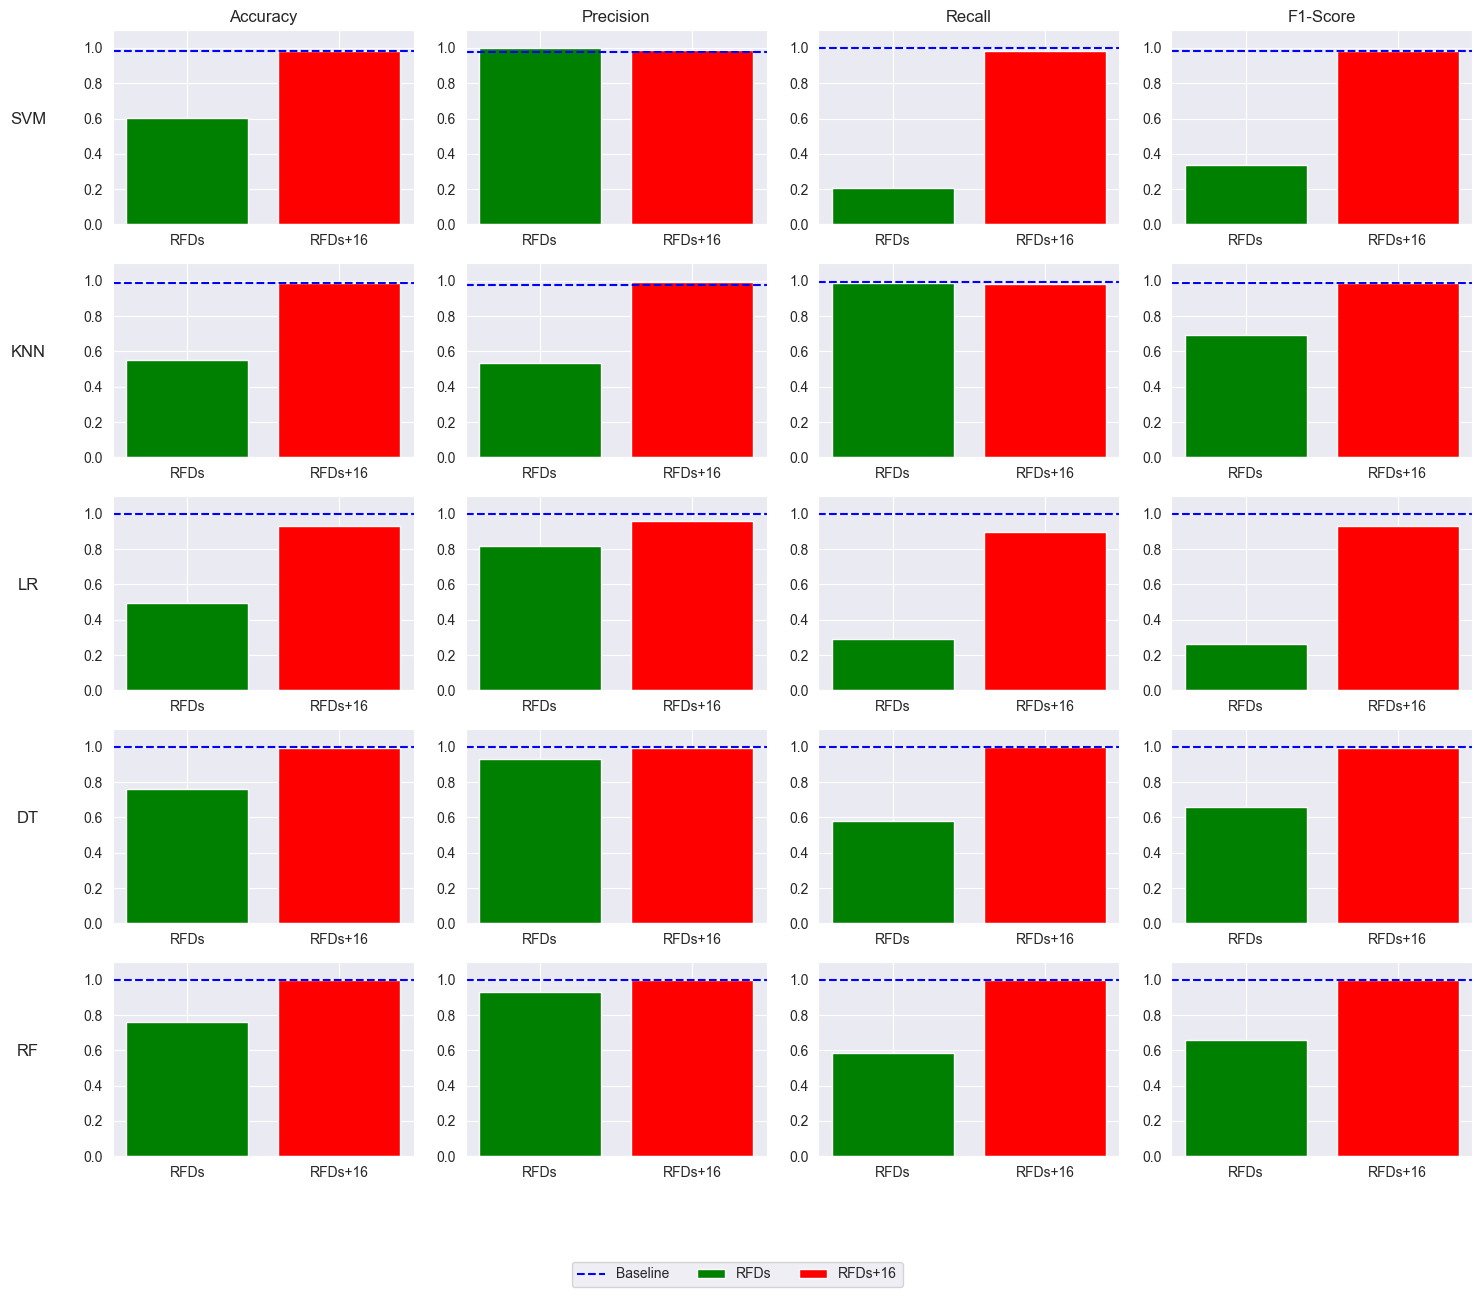

In [62]:
# Dati per le etichette
labels = ['Baseline', 'RFDs', 'RFDs+16']

values_matrix = np.array([
    # Accuracy
    [
        [0.981, 0.603, 0.985],      # SVM
        [0.986, 0.554, 0.987],      # KNN
        [0.997, 0.497, 0.931],      # LR
        [0.998, 0.761, 0.995],      # DT
        [0.998, 0.762, 0.999]       # RF
    ],
    # Precision
    [
        [0.976, 1.000, 0.990],      # SVM
        [0.979, 0.533, 0.992],      # KNN
        [0.997, 0.818, 0.962],      # LR
        [0.997, 0.932, 0.994],      # DT
        [0.998, 0.932, 0.998]       # RF
    ],
    # Recall
    [
        [0.997, 0.206, 0.980],      # SVM
        [0.993, 0.987, 0.981],      # KNN
        [0.997, 0.291, 0.898],      # LR
        [0.999, 0.582, 0.997],      # DT
        [0.999, 0.582, 1.000]       # RF
    ],
    # F1-Score
    [
        [0.981, 0.337, 0.985],      # SVM
        [0.986, 0.691, 0.986],      # KNN
        [0.997, 0.265, 0.929],      # LR
        [0.998, 0.659, 0.995],      # DT
        [0.998, 0.659, 0.999]       # RF
    ]
])

# Creazione della griglia 5x4 di subplots
fig, axs = plt.subplots(5, 4, figsize=(15, 12))

column_titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
row_titles = ['SVM', 'KNN', 'LR', 'DT', 'RF']
baseline_line = None

for i in range(5):
    for j in range(4):
        # barre per RFDs e RFDs+16
        bars = axs[i, j].bar(labels[1:], values_matrix[j, i, 1:], color=['green', 'red'])

        # linea tratteggiata per la Baseline
        baseline_line = axs[i, j].axhline(y=values_matrix[j, i, 0], color='blue', linestyle='--', label='Baseline')

        # Imposta l'intervallo dell'asse y da 0 a 1.1
        axs[i, j].set_ylim(0, 1.1)

# Aggiunta etichette per le colonne
for ax, col in zip(axs[0], column_titles):
    ax.set_title(col)

# Aggiunta etichette per le righe
for ax, row in zip(axs[:, 0], row_titles):
    ax.set_ylabel(row, rotation=0, size='large', labelpad=40)

# leggenda
handles = [baseline_line, bars[0], bars[1]]
labels = ['Baseline', 'RFDs', 'RFDs+16']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)


plt.tight_layout()
plt.show()